In [8]:
import pandas as pd

# Load the dataset
file_path = 'Pharmacies.csv'
pharmacy_df = pd.read_csv(file_path)

# Display basic info and the first few rows of the dataset to understand its structure
pharmacy_df.info(), pharmacy_df.head()

C:\Users\jacob\AppData\Local\Temp\ipykernel_10584\1856088507.py:5: DtypeWarning: Columns (33,34,42) have mixed types. Specify dtype option on import or set low_memory=False.
  pharmacy_df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62973 entries, 0 to 62972
Data columns (total 93 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID         62973 non-null  int64  
 1   ID          62973 non-null  int64  
 2   SECCLASS    62973 non-null  object 
 3   NAME        62973 non-null  object 
 4   TELEPHONE   62973 non-null  object 
 5   ADDRESS     62973 non-null  object 
 6   ADDRESS2    62973 non-null  object 
 7   CITY        62973 non-null  object 
 8   STATE       62973 non-null  object 
 9   ZIP         62973 non-null  int64  
 10  ZIPP4       62973 non-null  object 
 11  COUNTY      62973 non-null  object 
 12  FIPS        62973 non-null  int64  
 13  DIRECTIONS  62973 non-null  object 
 14  EMERGTITLE  62973 non-null  object 
 15  EMERGTEL    62973 non-null  object 
 16  EMERGEXT    62973 non-null  object 
 17  CONTDATE    61408 non-null  object 
 18  CONTHOW     62973 non-null  object 
 19  GEODATE     62973 non-nul

(None,
     FID        ID      SECCLASS                                        NAME  \
 0  1001  11699187  UNCLASSIFIED                      MOWRY MEDICAL PHARMACY   
 1  1002  11699219  UNCLASSIFIED                        MOWRY PLAZA PHARMACY   
 2  1003  11698012  UNCLASSIFIED  KAISER PERMANENTE DALY CITY MEDICAL OFFICE   
 3  1004  11697767  UNCLASSIFIED      KAISER PERMANENTE TRACY MEDICAL OFFICE   
 4  1005  11666870  UNCLASSIFIED                           WALGREENS - 13596   
 
       TELEPHONE                    ADDRESS     ADDRESS2       CITY STATE  \
 0  510-793-5011          1999 MOWRY AVENUE     SUITE 2A    FREMONT    CA   
 1  510-745-9900           668 MOWRY AVENUE                 FREMONT    CA   
 2  650-301-5788       395 HICKEY BOULEVARD  FIRST FLOOR  DALY CITY    CA   
 3  209-839-6212  2185 WEST GRANT LINE ROAD                   TRACY    CA   
 4  650-326-3404      300 UNIVERSITY AVENUE               PALO ALTO    CA   
 
      ZIP  ... PROVID_93 HEALTH_95  PROVID_96 P

In [9]:
# Dropping irrelevant columns that seem not useful for analysis
columns_to_drop = [
    'PROVID_11', 'PROVID_52', 'PROVID_56', 'PROVID_68', 'PROVID_72', 
    'PROVID_48', 'PROVID_76', 'PROVID_80', 'PROVID_100', 'PROVID_101',
    'HEALTH_95', 'HEALTH_99', 'HEALTH_103', 'PROVID_104', 'PROVID_105'
]

# Dropping the identified columns
cleaned_pharmacy_df = pharmacy_df.drop(columns=columns_to_drop)

# Dropping rows with missing values in 'CONTDATE' since it has more significant missing data
cleaned_pharmacy_df = cleaned_pharmacy_df.dropna(subset=['CONTDATE'])

# Displaying the cleaned dataframe info to ensure proper cleaning
cleaned_pharmacy_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 61408 entries, 0 to 62972
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID         61408 non-null  int64  
 1   ID          61408 non-null  int64  
 2   SECCLASS    61408 non-null  object 
 3   NAME        61408 non-null  object 
 4   TELEPHONE   61408 non-null  object 
 5   ADDRESS     61408 non-null  object 
 6   ADDRESS2    61408 non-null  object 
 7   CITY        61408 non-null  object 
 8   STATE       61408 non-null  object 
 9   ZIP         61408 non-null  int64  
 10  ZIPP4       61408 non-null  object 
 11  COUNTY      61408 non-null  object 
 12  FIPS        61408 non-null  int64  
 13  DIRECTIONS  61408 non-null  object 
 14  EMERGTITLE  61408 non-null  object 
 15  EMERGTEL    61408 non-null  object 
 16  EMERGEXT    61408 non-null  object 
 17  CONTDATE    61408 non-null  object 
 18  CONTHOW     61408 non-null  object 
 19  GEODATE     61408 non-null  ob

In [10]:
# Descriptive statistics for numeric columns
numeric_stats = cleaned_pharmacy_df.describe()
print(numeric_stats)

# Count unique values for important categorical columns
unique_counts = cleaned_pharmacy_df[['CITY', 'STATE', 'NAICSDESCR']].nunique()
print(unique_counts)

# Check the distribution of pharmacies across different states
state_distribution = cleaned_pharmacy_df['STATE'].value_counts()
print(state_distribution)

# Count most common business types
business_type_distribution = cleaned_pharmacy_df['NAICSDESCR'].value_counts()
print(business_type_distribution)


                FID            ID           ZIP          FIPS  NAICSCODE  \
count  61408.000000  6.140800e+04  61408.000000  61408.000000    61408.0   
mean   31612.446684  1.167637e+07  47969.452645  28492.737559   446110.0   
std    18237.959718  2.017310e+04  29153.164265  16560.634410        0.0   
min        1.000000  1.164063e+07    601.000000   1001.000000   446110.0   
25%    15836.750000  1.165951e+07  24740.000000  13047.000000   446110.0   
50%    31697.500000  1.167608e+07  44089.500000  28082.000000   446110.0   
75%    47425.250000  1.169340e+07  75150.000000  42011.000000   446110.0   
max    62974.000000  1.171228e+07  99929.000000  78030.000000   446110.0   

                  X             Y  
count  61408.000000  61408.000000  
mean     -90.064582     37.160780  
std       16.584509      5.713832  
min     -170.685707    -14.290313  
25%      -96.710461     33.744143  
50%      -85.425308     38.343254  
75%      -79.286984     41.088542  
max      145.729401     71.

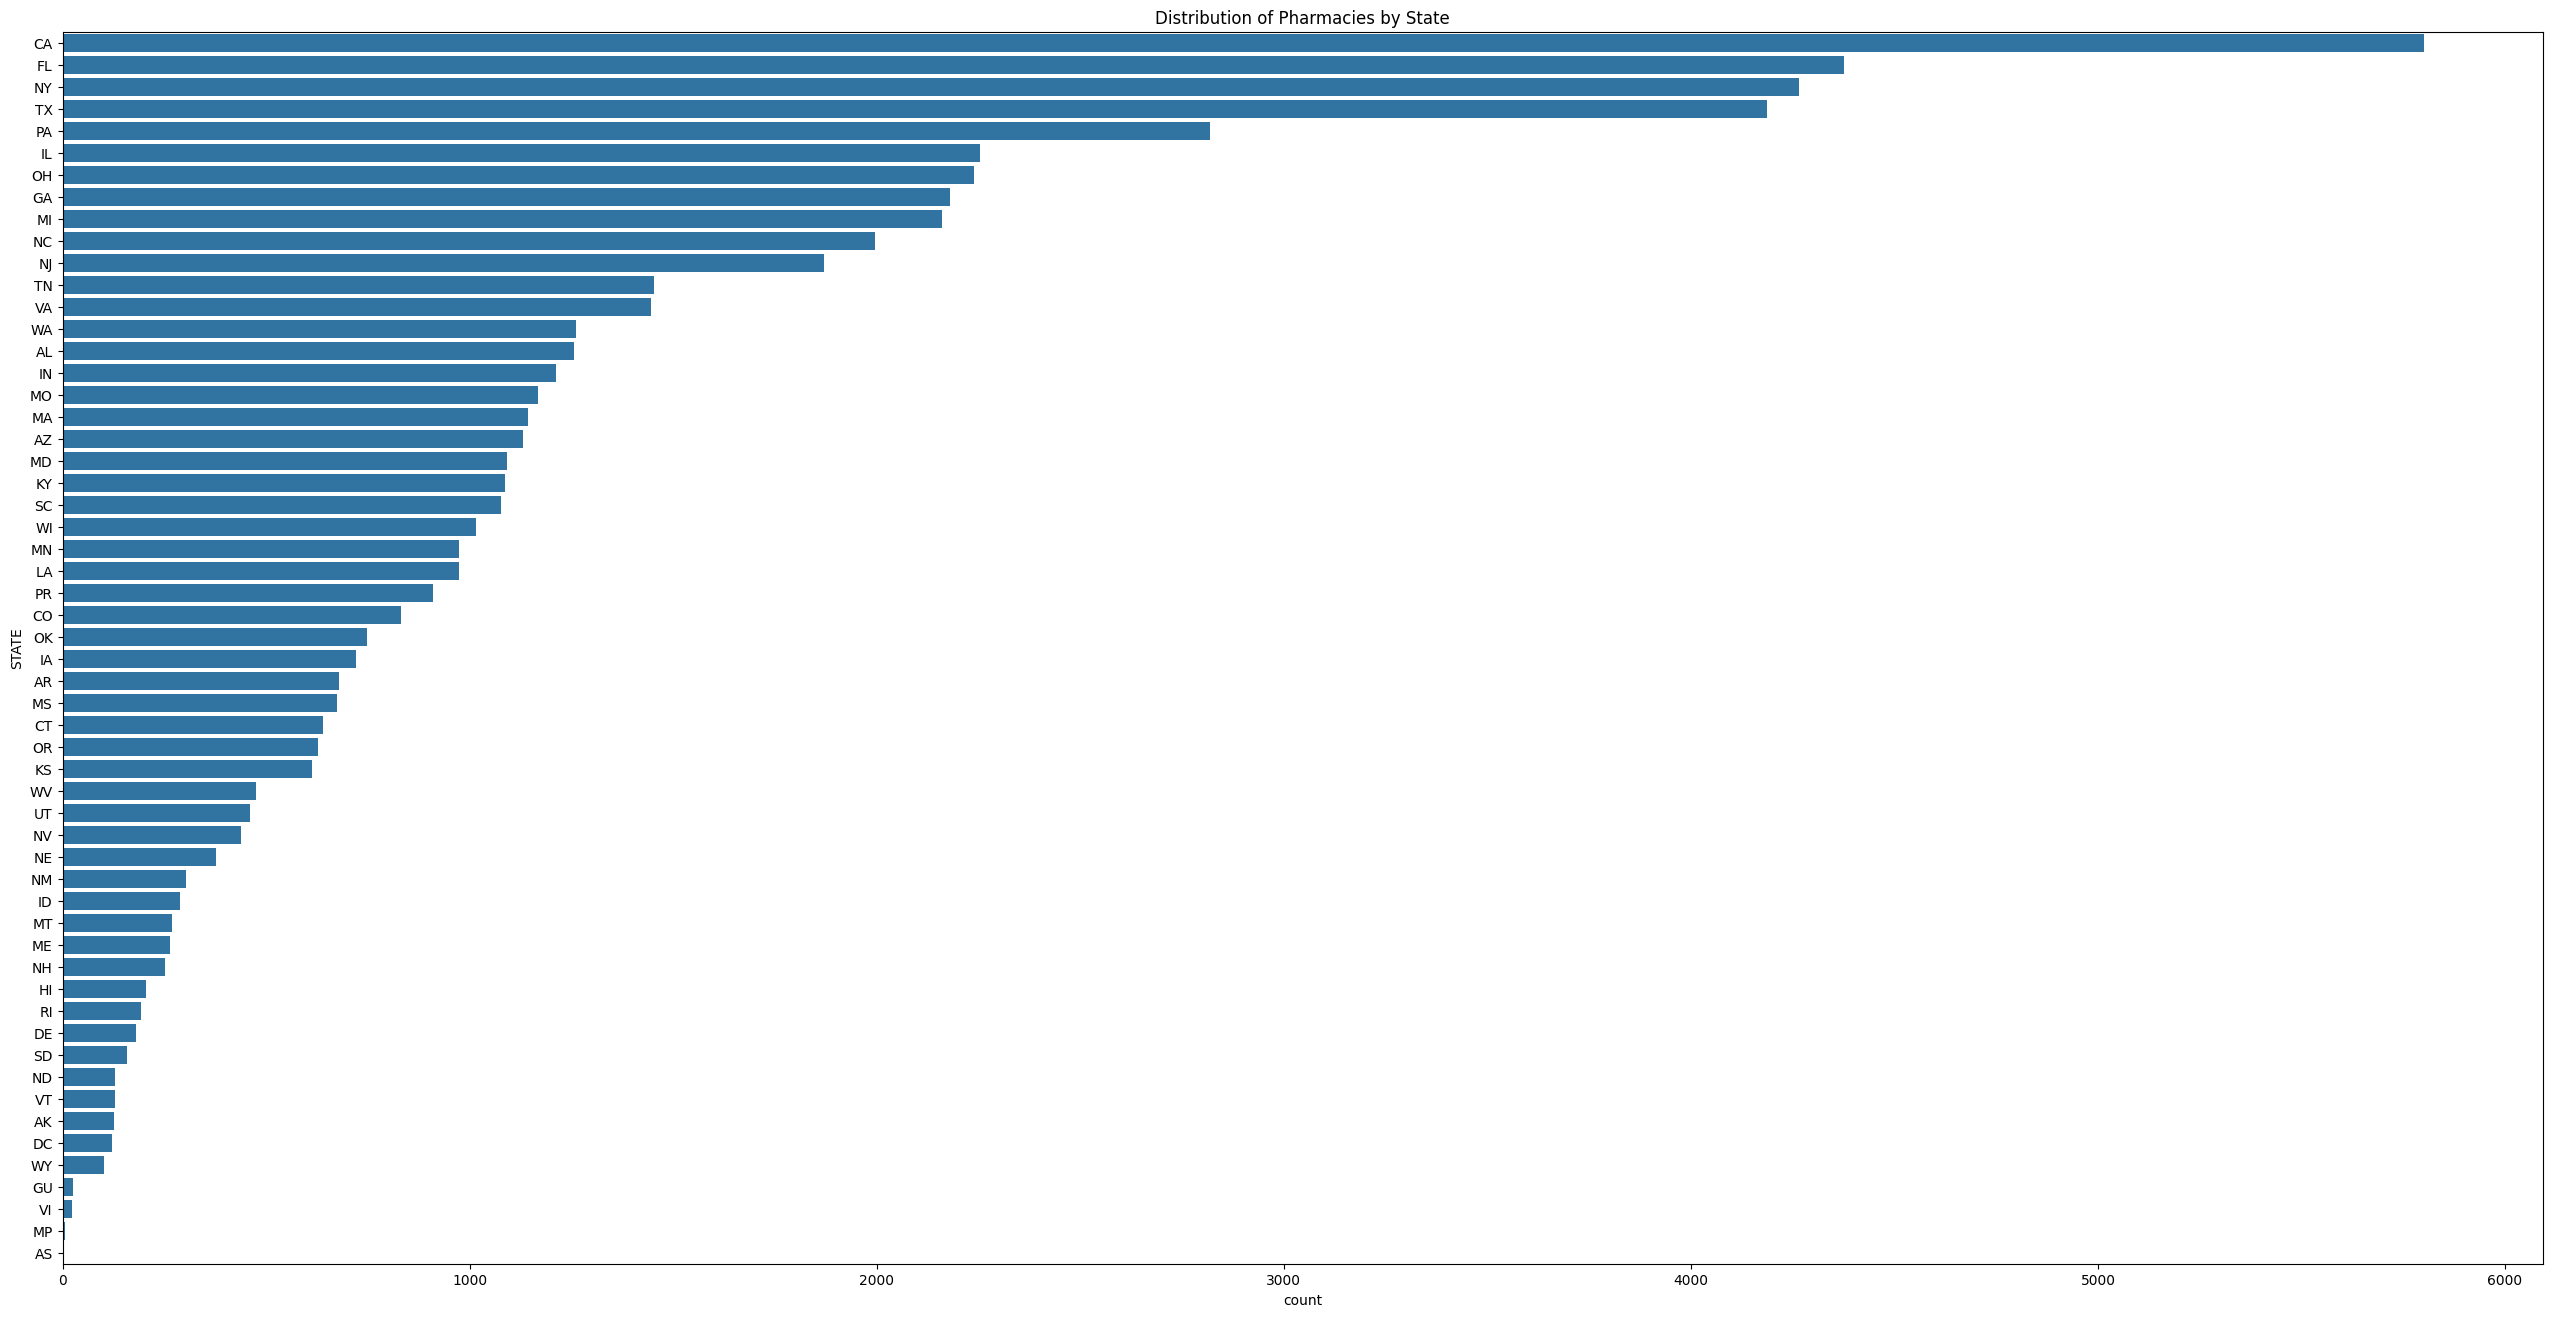

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of pharmacies by state
plt.figure(figsize=(32,16))
sns.countplot(y='STATE', data=cleaned_pharmacy_df, order=cleaned_pharmacy_df['STATE'].value_counts().index)
plt.title('Distribution of Pharmacies by State')
plt.show()




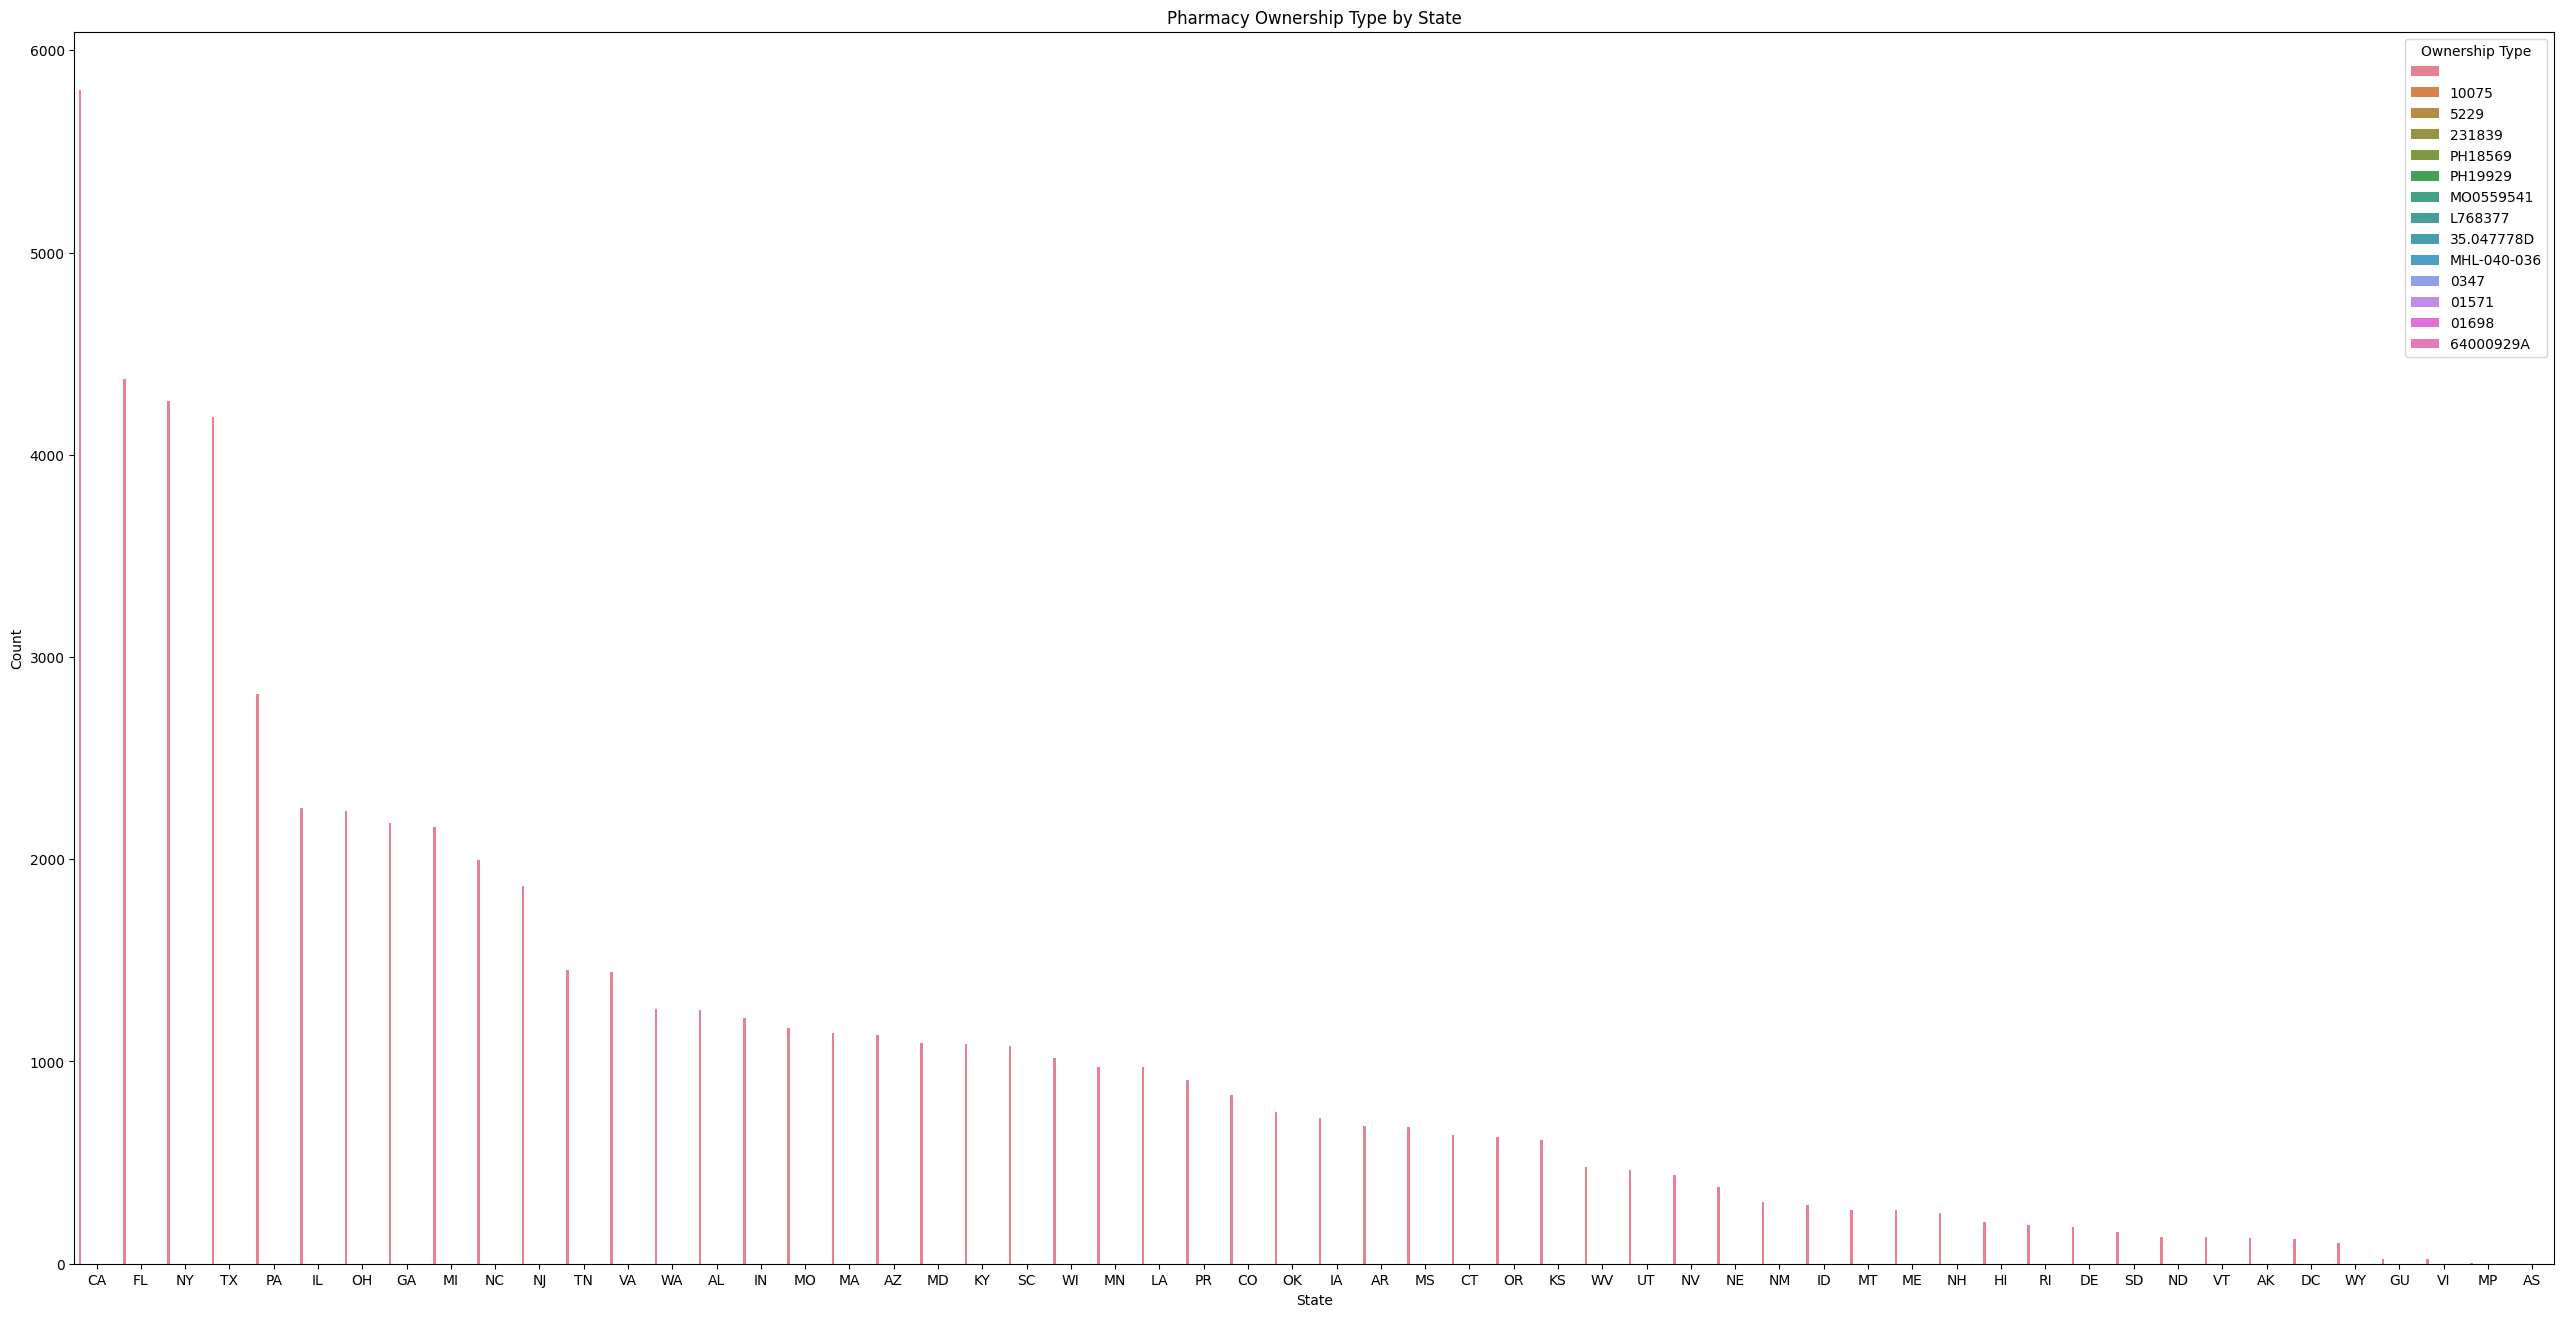

In [17]:
# Assuming 'PROVID_96' is the ownership type column (replace if needed)
plt.figure(figsize=(32, 16))
sns.countplot(x='STATE', hue='PROVID_96', data=cleaned_pharmacy_df, order=cleaned_pharmacy_df['STATE'].value_counts().index)
plt.title('Pharmacy Ownership Type by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Ownership Type')
plt.show()


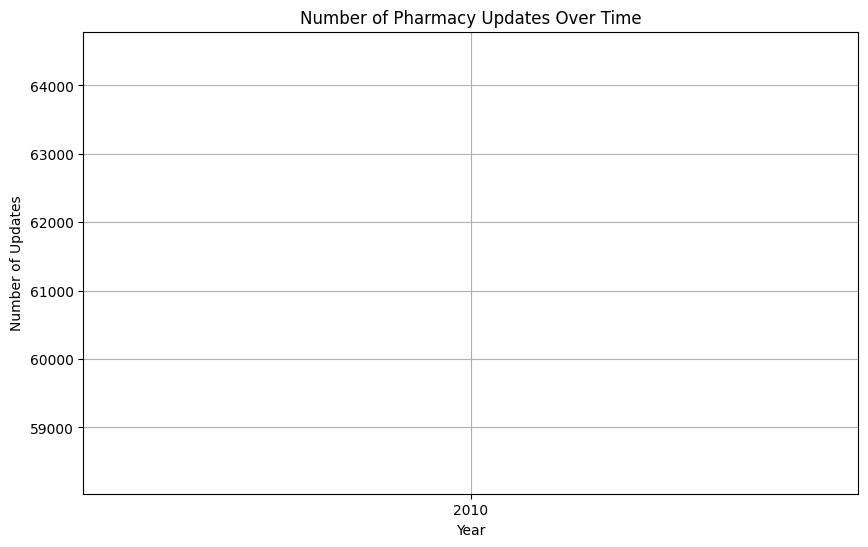

In [ ]:
cleaned_pharmacy_df['GEODATE'] = pd.to_datetime(cleaned_pharmacy_df['GEODATE'], errors='coerce')

# Grouping by year and counting the number of updates
pharmacy_updates_by_year = cleaned_pharmacy_df.groupby(cleaned_pharmacy_df['GEODATE'].dt.year).size()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(pharmacy_updates_by_year.index, pharmacy_updates_by_year.values, marker='o', linestyle='-')
plt.title('Number of Pharmacy Updates Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Updates')
plt.xticks(pharmacy_updates_by_year.index)  # Ensure all years are displayed on the x-axis
plt.grid()
plt.show()